In [1]:
import numpy as np
import napari
%gui qt

print('initialized')

initialized


In [7]:
dataPath = 'data/1_5ADVMLEG1L1_ch2.tif'
maskPath = 'data/1_5ADVMLEG1L1_ch2_dvMask.tif' # made in aics-segmentation
skelPath = 'data/1_5ADVMLEG1L1_ch2_dvSkel.tif' # made in Fiji

scale = [0.43, 0.2092527, 0.2092527] # um/pixel for [slice, x, y]

#create napari viewer
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(path=dataPath, scale=scale, colormap='green', name='data')
viewer.add_image(path=maskPath, scale=scale, colormap='gray', visible=False, name='mask')
viewer.add_image(path=skelPath, scale=scale, colormap='magenta', opacity=0.5, name='skel')


<Image layer 'skel' at 0x155a7e780>

In [5]:
import tifffile # to load .tif files
from skimage import morphology # to convert 3d mask to 1-pixel skeleton
import skan # to analyze skeleton
from IPython.display import display # to show pandas dataframe as a table

# load the mask
maskData = tifffile.imread(maskPath)

# make a 1-pixel skeleton from volume mask (similar to Fiji Skeletonize)
mySkeleton = morphology.skeletonize_3d(maskData)

# analyze the skeleton (similar to Fiji Analyze Skeleton)
mySkanSkel = skan.Skeleton(mySkeleton)

# look at the results
branch_data = skan.summarize(mySkanSkel) # branch_data is a pandas dataframe
print('    number of branche:', branch_data.shape[0])
display(branch_data.head())

#
# convert everything to nump arrays
branchDistance = branch_data['branch-distance'].to_numpy()
euclideanDistance = branch_data['euclidean-distance'].to_numpy()
#tortuosity = branchDistance / euclideanDistance # this gives divide by 0 warning
tmpOut = np.full_like(branchDistance, fill_value=np.nan)
tortuosity = np.divide(branchDistance, euclideanDistance, out=tmpOut, where=euclideanDistance!=0)



    number of branche: 760


,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
0,1,4,60,5.878315,1,1.0,0.0,0.0,133.0,343.0,3.000000,133.000000,339.000000,0.0,133.0,343.0,3.000000,133.000000,339.000000,5.000000
1,1,5,35,4.089073,1,1.0,0.0,0.0,136.0,364.0,2.666667,134.000000,366.333333,0.0,136.0,364.0,2.666667,134.000000,366.333333,4.068852
2,1,6,62,5.878315,1,1.0,0.0,0.0,141.0,352.0,3.000000,138.000000,353.000000,0.0,141.0,352.0,3.000000,138.000000,353.000000,4.358899
3,1,7,114,7.938927,1,1.0,0.0,0.0,146.0,339.0,4.857143,142.571429,336.857143,0.0,146.0,339.0,4.857143,142.571429,336.857143,6.319713
4,2,8,23,1.000000,0,1.0,0.0,1.0,117.0,378.0,2.000000,117.000000,378.000000,1.0,117.0,378.0,2.000000,117.000000,378.000000,1.000000


<IPython.core.display.Javascript object>


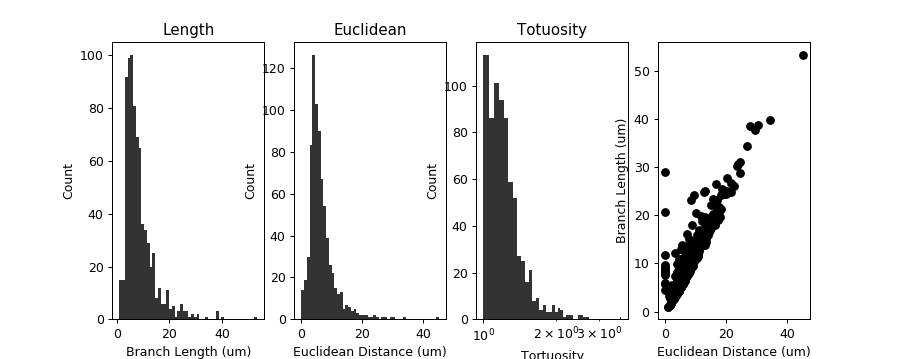

/Users/cudmore/Sites/bImPy/bImPy_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/cudmore/Sites/bImPy/bImPy_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [6]:
# plot with matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,4))

alpha = 0.8 #0.75


ax = plt.subplot(141)
ax.set_title('Length')
n, bins, patches = plt.hist(branchDistance, 50, density=False, facecolor='k', alpha=alpha)
plt.xlabel('Branch Length (um)')
plt.ylabel('Count')

ax = plt.subplot(142)
ax.set_title('Euclidean')
n, bins, patches = plt.hist(euclideanDistance, 50, density=False, facecolor='k', alpha=alpha)
plt.xlabel('Euclidean Distance (um)')
plt.ylabel('Count')

ax = plt.subplot(143)
ax.set_title('Totuosity')
n, bins, patches = plt.hist(tortuosity, 50, density=False, facecolor='k', alpha=alpha)
ax.set_xscale("log")
plt.xlabel('Log Tortuosity')
plt.ylabel('Count')

ax = plt.subplot(144)
ax.set_title('')
ax.plot(euclideanDistance, branchDistance, 'ok')
plt.xlabel('Euclidean Distance (um)')
plt.ylabel('Branch Length (um)')

plt.show()

if 0:
    viewer = napari.Viewer(ndisplay=3)
    viewer.add_image(path=dataPath, scale=scale, colormap='green', name='data')
    viewer.add_image(path=maskPath, scale=scale, colormap='gray', visible=False, name='mask')
    #viewer.add_image(path=skelPath, scale=scale, colormap='magenta', opacity=0.5, name='skel')
    viewer.add_image(data=skanSkel, scale=scale, colormap='magenta', opacity=0.5, name='skel')